In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [192]:
import phik #https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7

# Часть 1. EDA

## 1. Импорт данных

### 1-1 Скачайте датасет по ссылке: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [193]:
data = pd.read_csv('data.csv', index_col=0)

In [194]:
#1. технические штучки для копипасты, 2. если испортил df, то заного подгруждать не надо, можно начать с этого шага
df = data.copy()

In [195]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [196]:
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [197]:
df.shape

(569, 32)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

### Видно. что есть колонки с "0 non-null ". Удалим в общем виде все колонки, которые удовлетворяют условию 'Non-Null Count, %' > 'd_drop, %'

In [199]:
d_drop = 0 #переменная 'Non-Null Count, %' < 'd_drop, %', доля Non-Null Count

In [200]:
df.isna().sum()[df.isna().sum()>0]

Unnamed: 32    569
dtype: int64

In [201]:
df.isna().sum()[df.isna().sum()>0] / df.shape[0]

Unnamed: 32    1.0
dtype: float64

In [202]:
df_with_na=df.isna().sum()[df.isna().sum()>0] / data.shape[0]
df_with_na

Unnamed: 32    1.0
dtype: float64

In [203]:
spisok_to_drop=df_with_na[df_with_na > d_drop].index.tolist()
spisok_to_drop

['Unnamed: 32']

In [204]:
df = df.drop(columns = spisok_to_drop)

In [205]:
df.shape

(569, 31)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

### Пустых строк нет

In [207]:
df.dtypes.value_counts()

float64    30
object      1
dtype: int64

### Два типа данных float64, object

## 1-2 Посмотрите на базовые статистики датасета: средние, медианы, и т.д.

### 1-2-1 Для всех "float64"

In [208]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [209]:
df.describe().loc['mean'] #средние

radius_mean                 14.127292
texture_mean                19.289649
perimeter_mean              91.969033
area_mean                  654.889104
smoothness_mean              0.096360
compactness_mean             0.104341
concavity_mean               0.088799
concave points_mean          0.048919
symmetry_mean                0.181162
fractal_dimension_mean       0.062798
radius_se                    0.405172
texture_se                   1.216853
perimeter_se                 2.866059
area_se                     40.337079
smoothness_se                0.007041
compactness_se               0.025478
concavity_se                 0.031894
concave points_se            0.011796
symmetry_se                  0.020542
fractal_dimension_se         0.003795
radius_worst                16.269190
texture_worst               25.677223
perimeter_worst            107.261213
area_worst                 880.583128
smoothness_worst             0.132369
compactness_worst            0.254265
concavity_wo

In [210]:
df.describe().loc['50%'] #медиан

radius_mean                 13.370000
texture_mean                18.840000
perimeter_mean              86.240000
area_mean                  551.100000
smoothness_mean              0.095870
compactness_mean             0.092630
concavity_mean               0.061540
concave points_mean          0.033500
symmetry_mean                0.179200
fractal_dimension_mean       0.061540
radius_se                    0.324200
texture_se                   1.108000
perimeter_se                 2.287000
area_se                     24.530000
smoothness_se                0.006380
compactness_se               0.020450
concavity_se                 0.025890
concave points_se            0.010930
symmetry_se                  0.018730
fractal_dimension_se         0.003187
radius_worst                14.970000
texture_worst               25.410000
perimeter_worst             97.660000
area_worst                 686.500000
smoothness_worst             0.131300
compactness_worst            0.211900
concavity_wo

### 1-2-2 Разделим базовые статистики по групповой переменной diagnosis

In [211]:
# список столбцов с dtypes == 'object'
spisok_object = df.dtypes[df.dtypes == 'object'].index.tolist()
spisok_object

['diagnosis']

In [212]:
df[spisok_object]

,diagnosis
id,
842302,M
842517,M
84300903,M
84348301,M
84358402,M
...,...
926424,M
926682,M
926954,M


In [213]:
df.select_dtypes(include=['object']) # список столбцов с dtypes == 'object' через select_dtypes

,diagnosis
id,
842302,M
842517,M
84300903,M
84348301,M
84358402,M
...,...
926424,M
926682,M
926954,M


In [214]:
df['diagnosis'].value_counts(dropna=True) #diagnosis - целевая переменная value_counts

B    357
M    212
Name: diagnosis, dtype: int64

In [215]:
df['diagnosis'].value_counts(normalize=True) #diagnosis - целевая переменная доли

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

#### M = malignant = злокачественный, B = benign = доброкачественный

In [216]:
df.loc[df['diagnosis'] == 'B'].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530,...,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540,...,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760,...,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750,...,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


In [217]:
df.loc[df['diagnosis'] == 'B'].describe().loc['mean'] #средние

radius_mean                 12.146524
texture_mean                17.914762
perimeter_mean              78.075406
area_mean                  462.790196
smoothness_mean              0.092478
compactness_mean             0.080085
concavity_mean               0.046058
concave points_mean          0.025717
symmetry_mean                0.174186
fractal_dimension_mean       0.062867
radius_se                    0.284082
texture_se                   1.220380
perimeter_se                 2.000321
area_se                     21.135148
smoothness_se                0.007196
compactness_se               0.021438
concavity_se                 0.025997
concave points_se            0.009858
symmetry_se                  0.020584
fractal_dimension_se         0.003636
radius_worst                13.379801
texture_worst               23.515070
perimeter_worst             87.005938
area_worst                 558.899440
smoothness_worst             0.124959
compactness_worst            0.182673
concavity_wo

In [218]:
df.loc[df['diagnosis'] == 'B'].describe().loc['50%'] #медиан

radius_mean                 12.200000
texture_mean                17.390000
perimeter_mean              78.180000
area_mean                  458.400000
smoothness_mean              0.090760
compactness_mean             0.075290
concavity_mean               0.037090
concave points_mean          0.023440
symmetry_mean                0.171400
fractal_dimension_mean       0.061540
radius_se                    0.257500
texture_se                   1.108000
perimeter_se                 1.851000
area_se                     19.630000
smoothness_se                0.006530
compactness_se               0.016310
concavity_se                 0.018400
concave points_se            0.009061
symmetry_se                  0.019090
fractal_dimension_se         0.002808
radius_worst                13.350000
texture_worst               22.820000
perimeter_worst             86.920000
area_worst                 547.400000
smoothness_worst             0.125400
compactness_worst            0.169800
concavity_wo

In [219]:
df.loc[df['diagnosis'] == 'M'].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960,...,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598,...,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575,...,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075,...,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


In [220]:
df.loc[df['diagnosis'] == 'M'].describe().loc['mean'] #средние

radius_mean                  17.462830
texture_mean                 21.604906
perimeter_mean              115.365377
area_mean                   978.376415
smoothness_mean               0.102898
compactness_mean              0.145188
concavity_mean                0.160775
concave points_mean           0.087990
symmetry_mean                 0.192909
fractal_dimension_mean        0.062680
radius_se                     0.609083
texture_se                    1.210915
perimeter_se                  4.323929
area_se                      72.672406
smoothness_se                 0.006780
compactness_se                0.032281
concavity_se                  0.041824
concave points_se             0.015060
symmetry_se                   0.020472
fractal_dimension_se          0.004062
radius_worst                 21.134811
texture_worst                29.318208
perimeter_worst             141.370330
area_worst                 1422.286321
smoothness_worst              0.144845
compactness_worst        

In [221]:
df.loc[df['diagnosis'] == 'M'].describe().loc['50%'] #медиан

radius_mean                  17.325000
texture_mean                 21.460000
perimeter_mean              114.200000
area_mean                   932.000000
smoothness_mean               0.102200
compactness_mean              0.132350
concavity_mean                0.151350
concave points_mean           0.086280
symmetry_mean                 0.189900
fractal_dimension_mean        0.061575
radius_se                     0.547200
texture_se                    1.102500
perimeter_se                  3.679500
area_se                      58.455000
smoothness_se                 0.006209
compactness_se                0.028590
concavity_se                  0.037125
concave points_se             0.014205
symmetry_se                   0.017700
fractal_dimension_se          0.003739
radius_worst                 20.590000
texture_worst                28.945000
perimeter_worst             138.000000
area_worst                 1303.000000
smoothness_worst              0.143450
compactness_worst        

### Сравним таблички 'mean', '50%'

In [222]:
print(pd.DataFrame({'B':df.loc[df['diagnosis'] == 'B'].describe().loc['mean'].values, 
              'M':df.loc[df['diagnosis'] == 'M'].describe().loc['mean'].values}, 
             index = df.loc[df['diagnosis'] == 'B'].describe().loc['mean'].index))

                                  B            M
radius_mean               12.146524    17.462830
texture_mean              17.914762    21.604906
perimeter_mean            78.075406   115.365377
area_mean                462.790196   978.376415
smoothness_mean            0.092478     0.102898
compactness_mean           0.080085     0.145188
concavity_mean             0.046058     0.160775
concave points_mean        0.025717     0.087990
symmetry_mean              0.174186     0.192909
fractal_dimension_mean     0.062867     0.062680
radius_se                  0.284082     0.609083
texture_se                 1.220380     1.210915
perimeter_se               2.000321     4.323929
area_se                   21.135148    72.672406
smoothness_se              0.007196     0.006780
compactness_se             0.021438     0.032281
concavity_se               0.025997     0.041824
concave points_se          0.009858     0.015060
symmetry_se                0.020584     0.020472
fractal_dimension_se

In [223]:
print(pd.DataFrame({'B':df.loc[df['diagnosis'] == 'B'].describe().loc['50%'].values, 
              'M':df.loc[df['diagnosis'] == 'M'].describe().loc['50%'].values}, 
             index = df.loc[df['diagnosis'] == 'B'].describe().loc['50%'].index))

                                  B            M
radius_mean               12.200000    17.325000
texture_mean              17.390000    21.460000
perimeter_mean            78.180000   114.200000
area_mean                458.400000   932.000000
smoothness_mean            0.090760     0.102200
compactness_mean           0.075290     0.132350
concavity_mean             0.037090     0.151350
concave points_mean        0.023440     0.086280
symmetry_mean              0.171400     0.189900
fractal_dimension_mean     0.061540     0.061575
radius_se                  0.257500     0.547200
texture_se                 1.108000     1.102500
perimeter_se               1.851000     3.679500
area_se                   19.630000    58.455000
smoothness_se              0.006530     0.006209
compactness_se             0.016310     0.028590
concavity_se               0.018400     0.037125
concave points_se          0.009061     0.014205
symmetry_se                0.019090     0.017700
fractal_dimension_se

### 1-2-3 Постройте гистограммы/распределения признаков, при этом используйте целевую переменную, чтобы сгруппировать и раскрасить гистограммы.

In [224]:
from category_encoders import OrdinalEncoder, OneHotEncoder
#enc = OneHotEncoder()
#enc.fit_transform(data[['diagnosis']]).head()

enc = OrdinalEncoder()
enc.fit(data[["diagnosis"]])
df[["diagnosis"]] = enc.transform(data[["diagnosis"]])

In [225]:
def graf(df, col):
    return sns.histplot(data=df, x=df[col], hue="diagnosis", multiple="dodge", shrink=0.8)
#for col in df.drop(columns = 'diagnosis'):
#    graf(df, col)

<AxesSubplot:xlabel='radius_mean', ylabel='Count'>

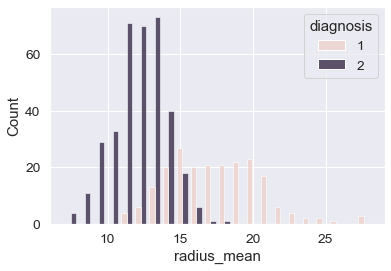

In [226]:
graf(df, 'radius_mean')

<AxesSubplot:xlabel='perimeter_se', ylabel='Count'>

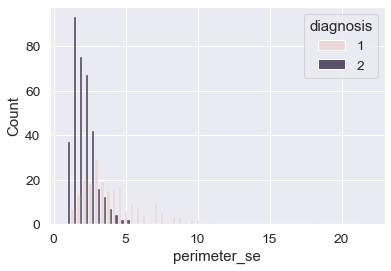

In [227]:
graf(df, 'perimeter_se')

<AxesSubplot:xlabel='symmetry_worst', ylabel='Count'>

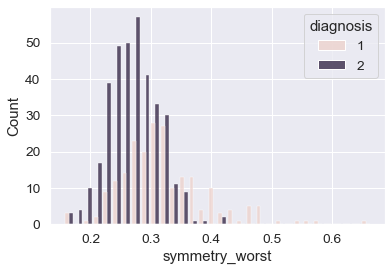

In [228]:
graf(df, 'symmetry_worst')

<AxesSubplot:xlabel='smoothness_se', ylabel='Count'>

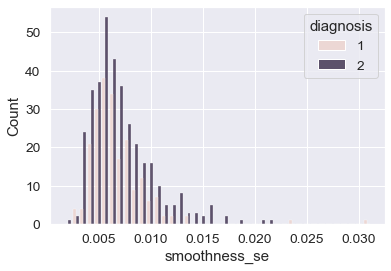

In [229]:
graf(df, 'smoothness_se')

<AxesSubplot:xlabel='concavity_mean', ylabel='Count'>

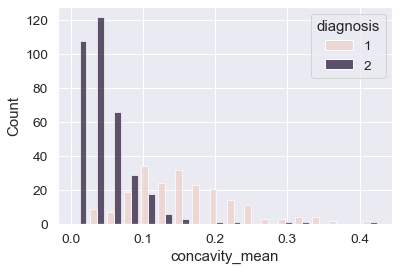

In [230]:
graf(df, 'concavity_mean')

#### Вывод: наблюдается различные распределения переменных для целевой 

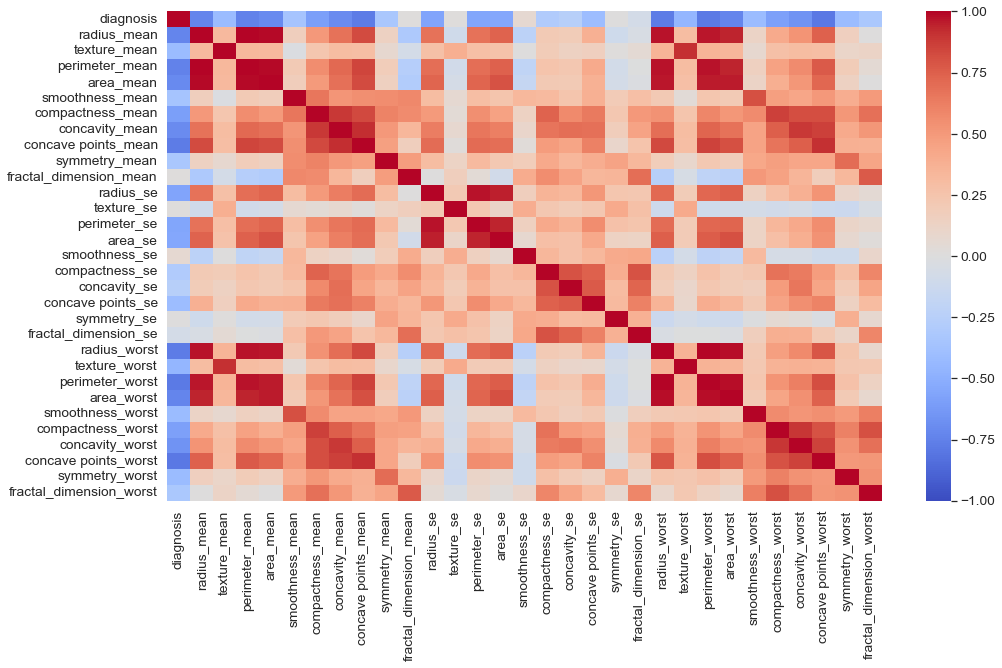

In [231]:
plt.subplots(figsize=(16,9))
sns.heatmap(df.corr(), cmap=sns.color_palette("coolwarm", 10000), vmin=-1, center=0)
plt.show()

interval columns not set, guessing: ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


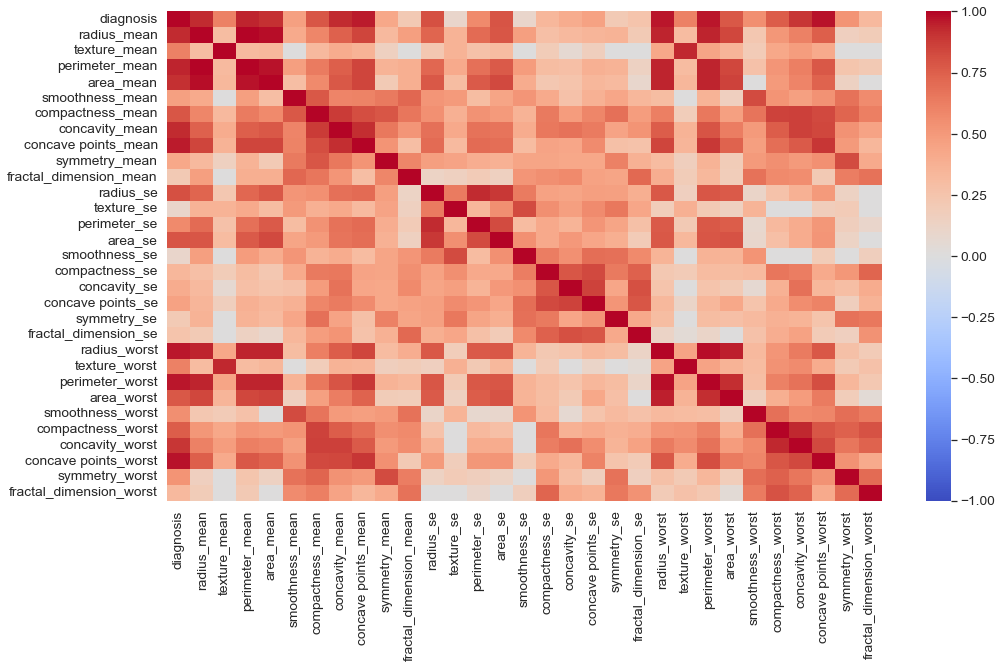

In [232]:
plt.subplots(figsize=(16,9))
sns.heatmap(df.phik_matrix(), cmap=sns.color_palette("coolwarm", 10000), vmin=-1, center=0)
plt.show()

In [233]:
phik_overview = df.phik_matrix()
phik_matrix = phik_overview[['diagnosis']]

interval columns not set, guessing: ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [234]:
df.phik_matrix().shape

interval columns not set, guessing: ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


(31, 31)

In [235]:
corr_matrix = df.corr()[['diagnosis']]

In [236]:
df.corr().shape

(31, 31)

In [237]:
df_temp = pd.concat([phik_matrix, corr_matrix], axis = 1) #временный датафрейм
df_temp.columns = ['phik_matrix', 'corr_matrix']
df_temp['corr_matrix_abs'] = np.abs(df_temp['corr_matrix'])
df_temp = df_temp[['phik_matrix', 'corr_matrix_abs', 'corr_matrix']]
print(df_temp.sort_values('corr_matrix_abs', ascending=False))

                         phik_matrix  corr_matrix_abs  corr_matrix
diagnosis                   1.000000         1.000000     1.000000
concave points_worst        0.970464         0.793566    -0.793566
perimeter_worst             0.966390         0.782914    -0.782914
concave points_mean         0.958439         0.776614    -0.776614
radius_worst                0.961195         0.776454    -0.776454
perimeter_mean              0.938738         0.742636    -0.742636
area_worst                  0.776810         0.733825    -0.733825
radius_mean                 0.927844         0.730029    -0.730029
area_mean                   0.911752         0.708984    -0.708984
concavity_mean              0.924847         0.696360    -0.696360
concavity_worst             0.897387         0.659610    -0.659610
compactness_mean            0.781442         0.596534    -0.596534
compactness_worst           0.758899         0.590998    -0.590998
radius_se                   0.809353         0.567134    -0.56

#### выберем k nlargest признаков по стоблцу df_temp[corr_matrix]

In [238]:
k = 9
spisok_feature = df_temp.nlargest(k, 'corr_matrix_abs').index.tolist()

In [239]:
spisok_feature

['diagnosis',
 'concave points_worst',
 'perimeter_worst',
 'concave points_mean',
 'radius_worst',
 'perimeter_mean',
 'area_worst',
 'radius_mean',
 'area_mean']

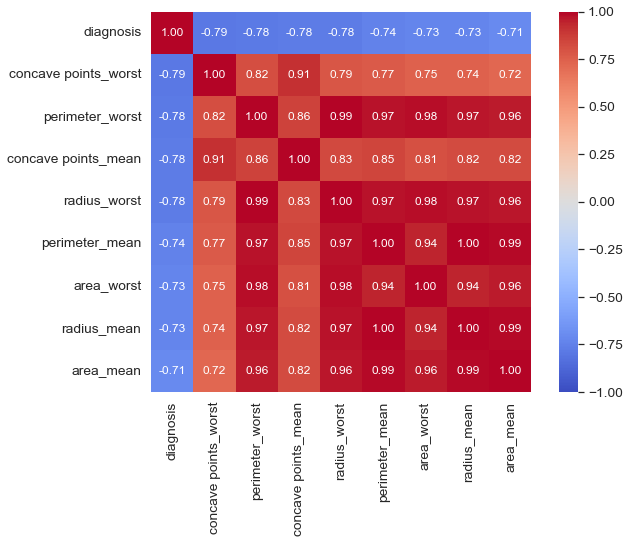

In [240]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.25)
sns.heatmap(df[spisok_feature].corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12},\
                yticklabels=spisok_feature, xticklabels=spisok_feature, vmin=-1, center=0,\
                    cmap=sns.color_palette('coolwarm',1000))
plt.show()

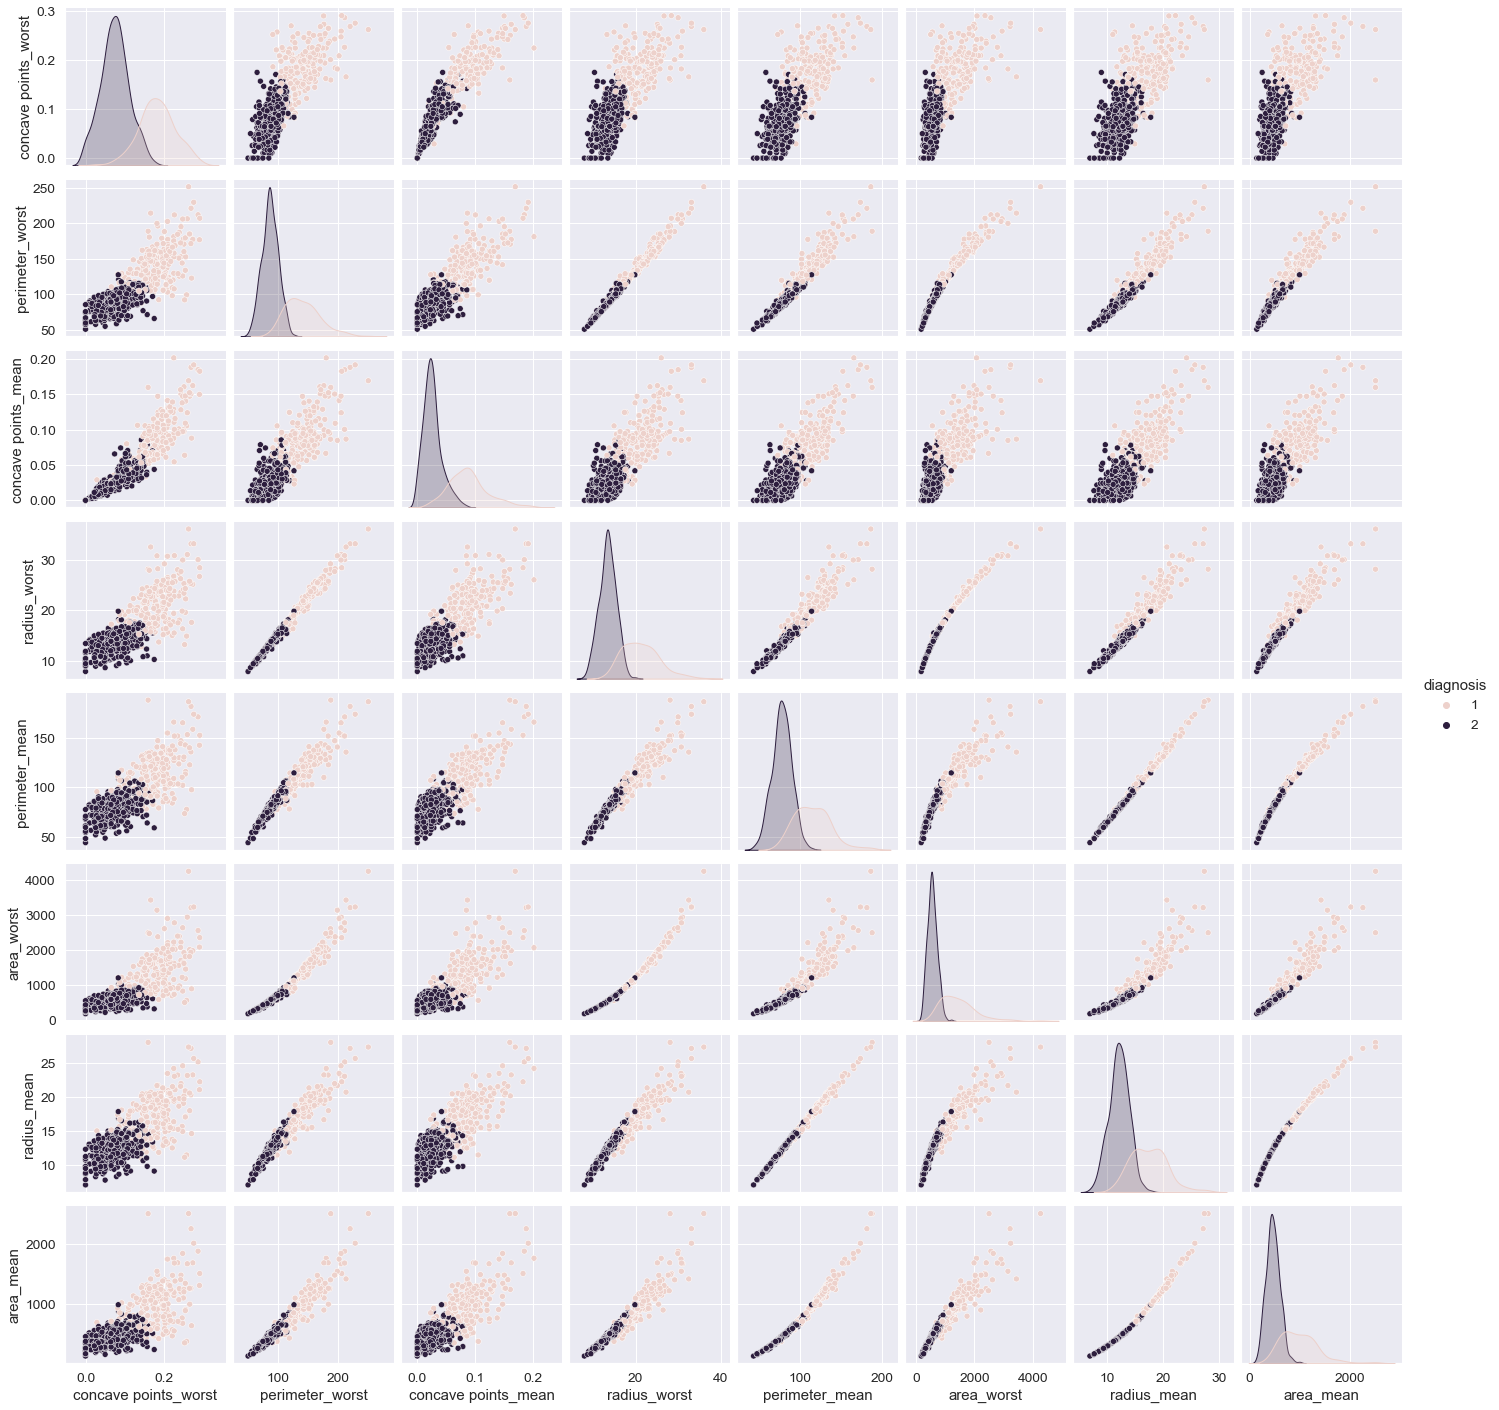

In [241]:
sns.pairplot(data=df[spisok_feature], hue='diagnosis')

#### выберем ksmal nsmallest признаков по стоблцу df_temp[corr_matrix]

In [242]:
ksmal = 9
spisok_feature_smal = df_temp.nsmallest(ksmal, 'corr_matrix_abs').index.tolist()
spisok_feature_smal.insert(0, 'diagnosis')

In [243]:
spisok_feature_smal

['diagnosis',
 'symmetry_se',
 'texture_se',
 'fractal_dimension_mean',
 'smoothness_se',
 'fractal_dimension_se',
 'concavity_se',
 'compactness_se',
 'fractal_dimension_worst',
 'symmetry_mean']

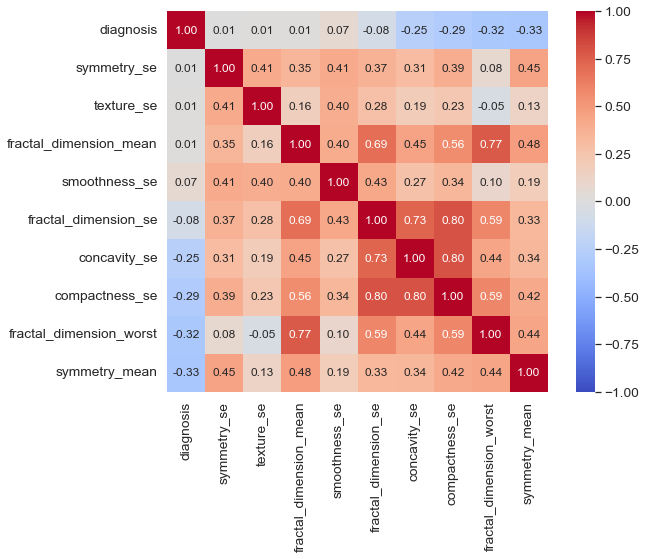

In [244]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.25)
sns.heatmap(df[spisok_feature_smal].corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12},\
                yticklabels=spisok_feature_smal, xticklabels=spisok_feature_smal, vmin=-1, center=0,\
                    cmap=sns.color_palette('coolwarm',1000))
plt.show()

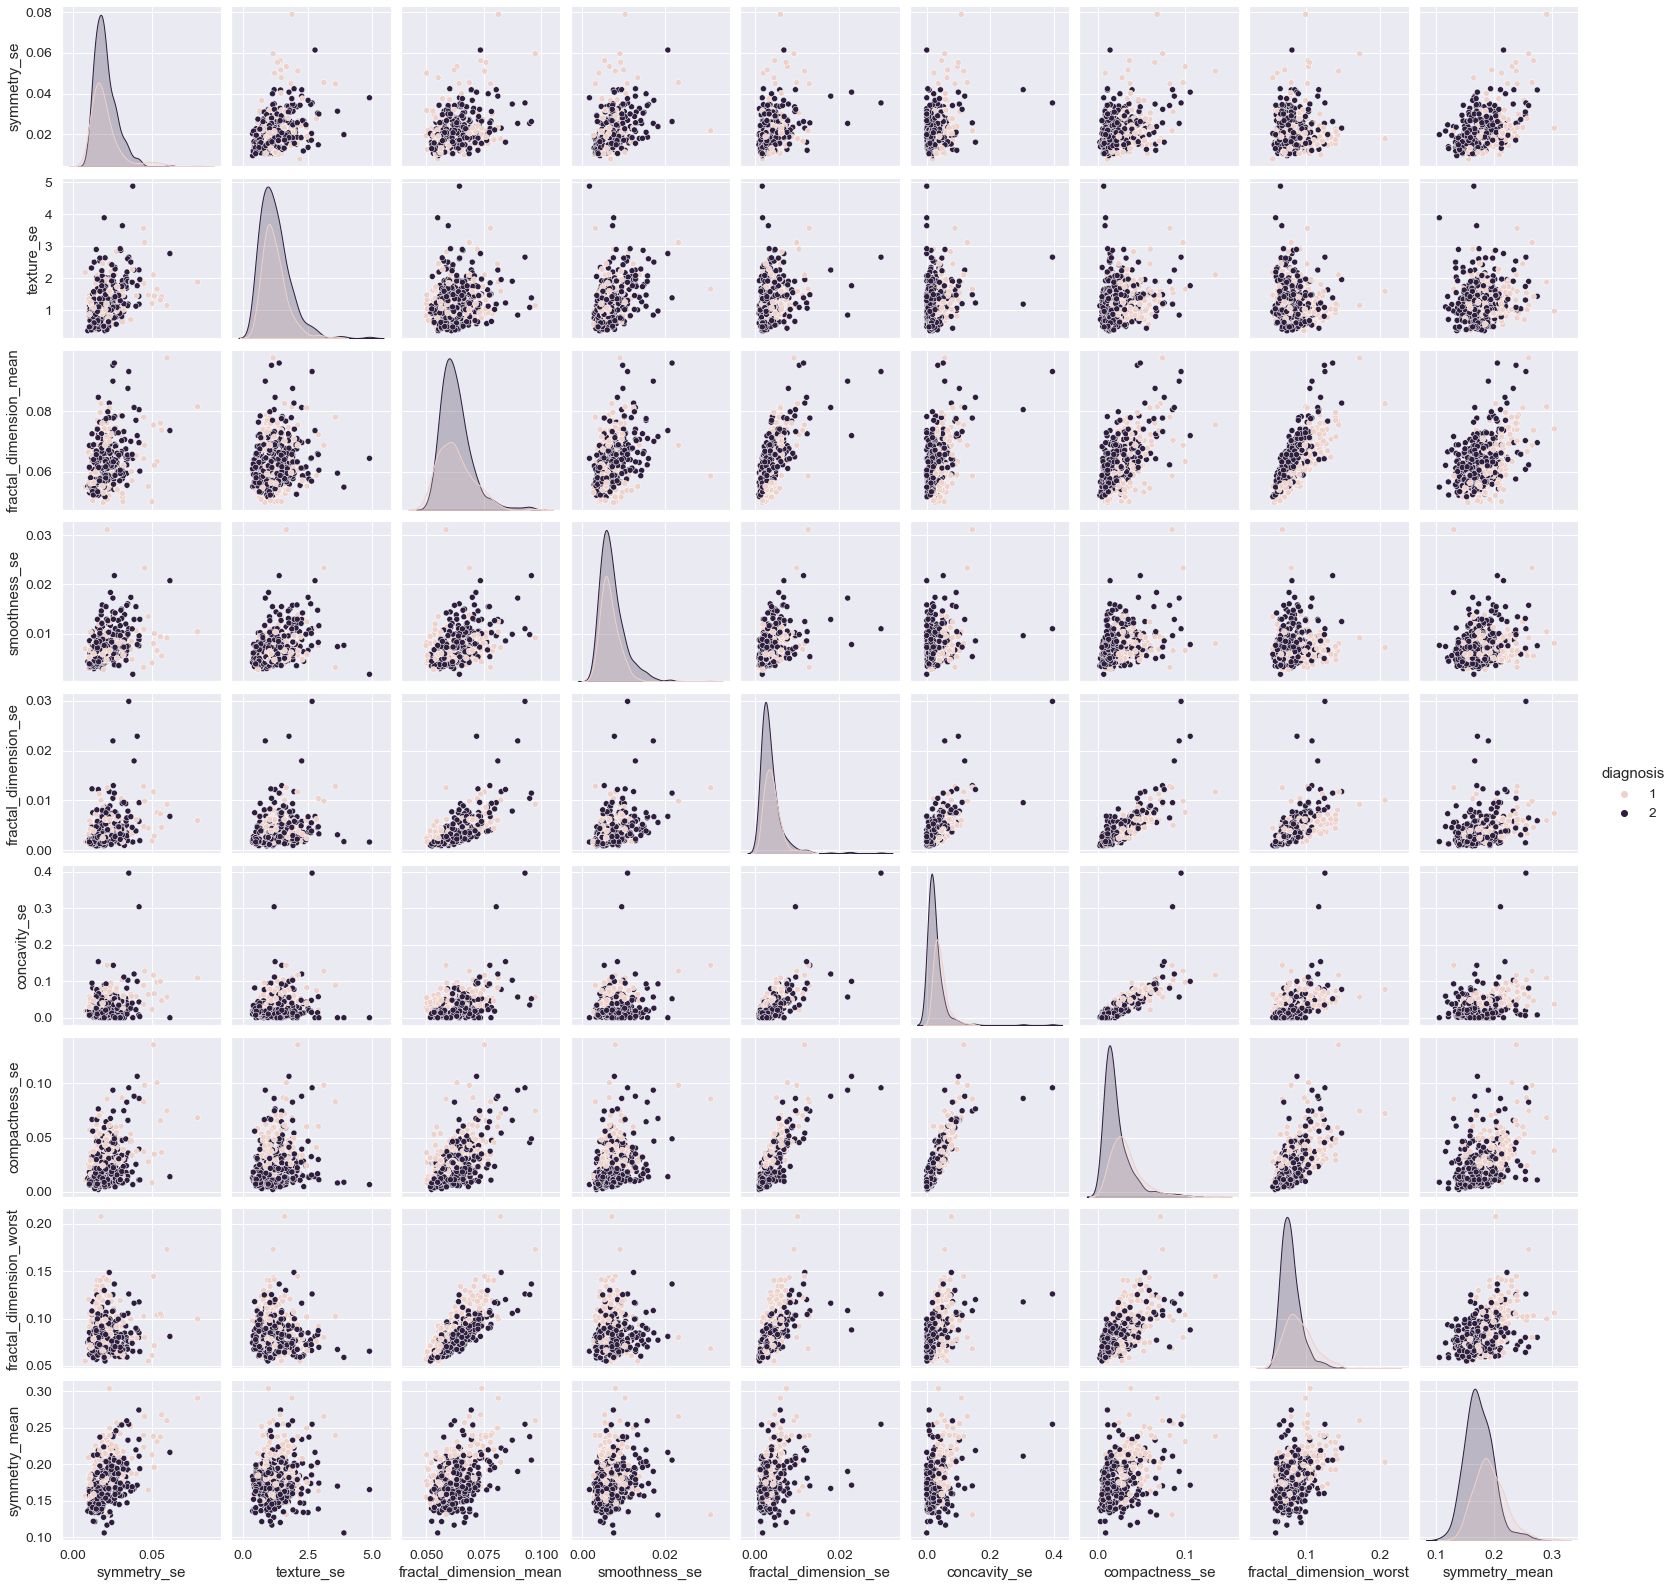

In [245]:
sns.pairplot(data=df[spisok_feature_smal], hue='diagnosis')

#### У сильно скоррелированных признаков наблюдается линейная зависимость

### 1-2-4 Используя boxplots и группировку по целевой переменной, предположить, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных.

In [246]:
spisok_feature

['diagnosis',
 'concave points_worst',
 'perimeter_worst',
 'concave points_mean',
 'radius_worst',
 'perimeter_mean',
 'area_worst',
 'radius_mean',
 'area_mean']

In [247]:
def graf_boxplot (df, col):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='diagnosis', y=df[col])
    plt.show()

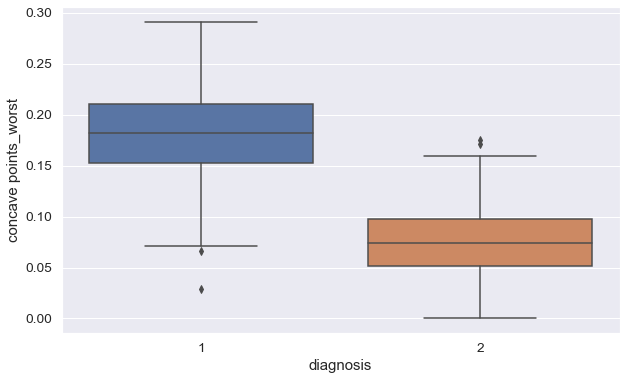

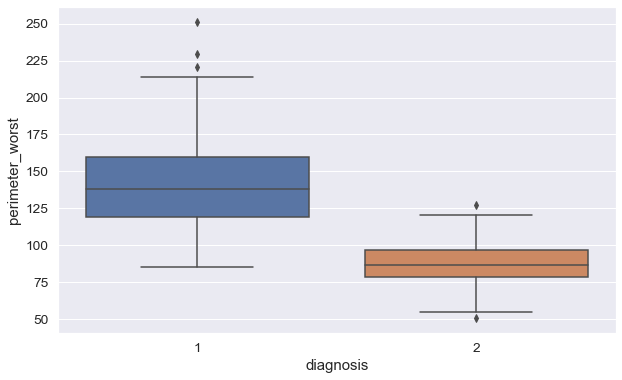

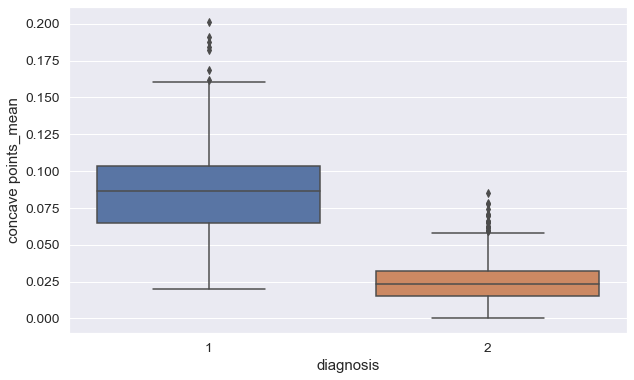

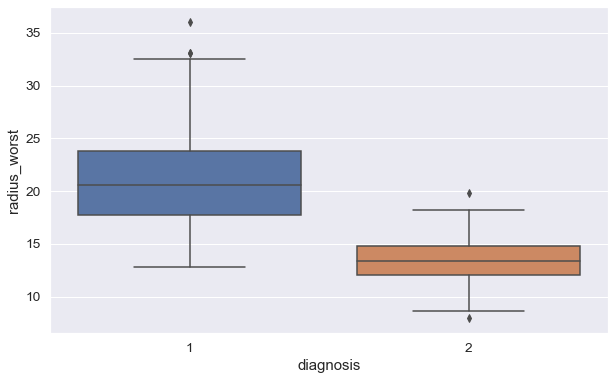

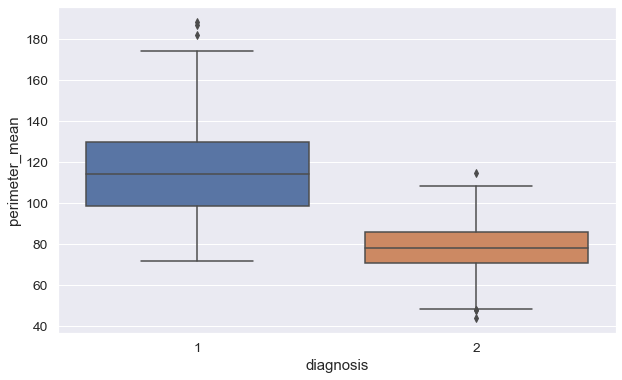

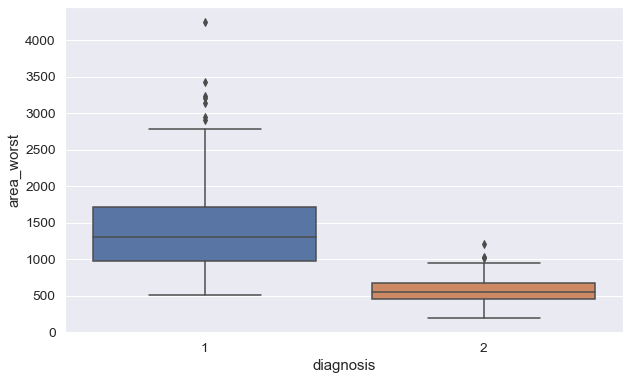

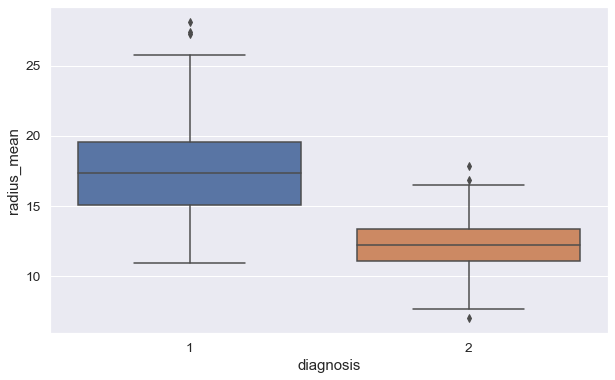

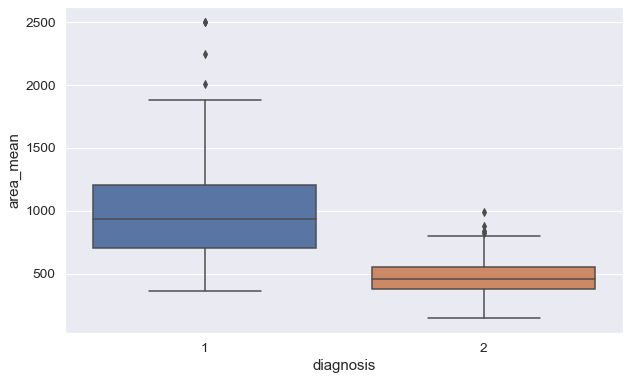

In [248]:
for col in spisok_feature:
    if col == 'diagnosis': pass
    else: 
        graf_boxplot(df, col)   

#### Наиболее удобно было бы отделить злокачественные новообразования от доброкачественных по следюущим переменным: 'concave points_worst',  'perimeter_worst',  'concave points_mean',  'radius_worst',  'perimeter_mean',  'area_worst', 'radius_mean',  'area_mean'

# Часть 2. Моделирование при помощи kNN

## 2.1 Данные на train-test, отложив 30% выборки для тестирования.

In [249]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['diagnosis'], axis=1), df['diagnosis'], test_size=0.30, random_state=42, stratify=data['diagnosis'])

In [250]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [251]:
y_train.value_counts(normalize=True)

2    0.628141
1    0.371859
Name: diagnosis, dtype: float64

In [252]:
y_test.value_counts(normalize=True)

2    0.625731
1    0.374269
Name: diagnosis, dtype: float64

## 2.2 Непрерывные переменные к одному масштабу при помощи стандартизации. 
### Здесь нужна стандартизация, потому что признаки в неизвестных масштабах. Стандартизация приведет признаки к одному масштабу

In [253]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [254]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

## 2.3 Модель kNN "из коробки" без настройки параметров. Оценить метрики качества бинарной классификации (accuracy, precision, recall, f1_score), построить ROC-кривую и посчитайте площадь под ней.

In [255]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [256]:
def quality(prediction_y, true_y):
    accuracy = accuracy_score(prediction_y, true_y)
    precision = precision_score(prediction_y, true_y)
    recall = recall_score(prediction_y, true_y)
    f1 = f1_score(prediction_y, true_y)
    print((f'Accuracy: {round(accuracy, 3)}, ' 
           f'nPrecision: {round(precision, 3)}, ' 
           f'Recall: {round(recall, 3)}, ' 
           f'F1-score: {round(f1, 3)}'))

In [257]:
y_pred = knn.predict(X_test_scaled)
quality(y_pred, y_test)

Accuracy: 0.965, nPrecision: 0.906, Recall: 1.0, F1-score: 0.951


In [258]:
from sklearn.metrics import roc_auc_score
print(f'roc_auc_score: {round(roc_auc_score(knn.predict(X_test_scaled), y_test), 3)}')

roc_auc_score: 0.973


### ROC-кривая

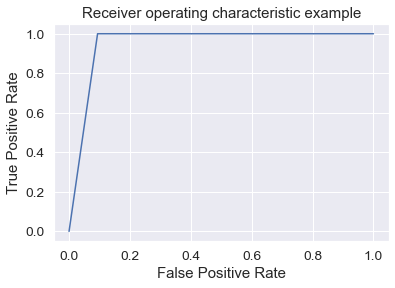

In [259]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
metrics.auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()

## 2.4  настройку параметра числа соседей на кросс-валидации. Снова оцените результаты

In [260]:
# импортировать
from sklearn.model_selection import cross_val_score
# используем ту же модель, что и раньше 
knn = KNeighborsClassifier(n_neighbors = 5)
# X_test_scaled,y_test будет автоматически разделенный на 5 папок, 
#для подсчета очков я все равно буду использовать показатели f1 
scores = cross_val_score(knn, X_test_scaled, y_test, cv=5, scoring='f1')
# напечатать все 5 результатов 
print(scores)
# затем я получу среднее значение по этим пяти оценкам, чтобы получить более высокую оценку точности. 
print(scores.mean()) 

[0.96 1.   0.96 1.   0.88]
0.96


при k = 6 scoring max = 0.9601


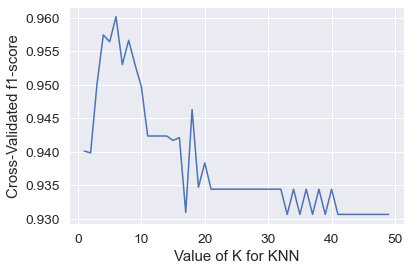

In [261]:
# выбираем k от 1 до 50 
k_range = range(1, 50)
k_scores = []
# использовать итерацию для расчета различных k в моделях, затем вернуть среднюю точность на основе перекрестной проверки
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='f1')
    k_scores.append(scores.mean())
    #print(f'{k}: {np.round(k_scores, 3)}')
# график для ясности
print(f'при k = {np.argmax(np.array(k_scores))+1} scoring max = {round(np.max(np.array(k_scores)), 4)}')
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated f1-score')
plt.show()

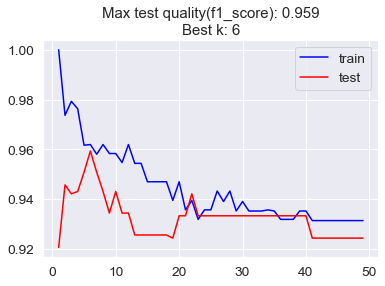

In [262]:
neighbors = range(1, 50)
f1_score_train = []
f1_score_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    f1_score_train.append(f1_score(knn.predict(X_train_scaled), y_train))
    f1_score_test.append(f1_score(knn.predict(X_test_scaled), y_test))
    
plt.plot(neighbors, f1_score_train, color='blue', label='train')
plt.plot(neighbors, f1_score_test, color='red', label='test')
plt.title("Max test quality(f1_score): {:.3f}\nBest k: {}".format(max(f1_score_test), np.argmax(f1_score_test)+1))
plt.legend();

In [263]:
knn_k = 6
knn = KNeighborsClassifier(n_neighbors=knn_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
quality(y_pred, y_test)
print(f'roc_auc_score: {round(roc_auc_score(knn.predict(X_test_scaled), y_test), 3)}')

Accuracy: 0.971, nPrecision: 0.922, Recall: 1.0, F1-score: 0.959
roc_auc_score: 0.978


#### При knn_k = 6 качество модели лучше, чем при knn_k = 5

# Моделирование при помощи kNN по признакам:
## 'concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean'

In [264]:
df = df[['diagnosis', 'concave points_worst', 'perimeter_worst', 'concave points_mean', 
      'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean']]

In [265]:
df

,diagnosis,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean
id,,,,,,,,,
842302,1,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0
842517,1,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0
84300903,1,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0
84348301,1,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,386.1
84358402,1,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0
...,...,...,...,...,...,...,...,...,...
926424,1,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0
926682,1,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0
926954,1,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1


In [266]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['diagnosis'], axis=1), df['diagnosis'], test_size=0.30, random_state=42, stratify=data['diagnosis'])

In [267]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 8), (171, 8), (398,), (171,))

In [268]:
y_train.value_counts(normalize=True)

2    0.628141
1    0.371859
Name: diagnosis, dtype: float64

In [269]:
y_test.value_counts(normalize=True)

2    0.625731
1    0.374269
Name: diagnosis, dtype: float64

In [270]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [271]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [272]:
y_pred = knn.predict(X_test_scaled)
quality(y_pred, y_test)

Accuracy: 0.942, nPrecision: 0.875, Recall: 0.966, F1-score: 0.918


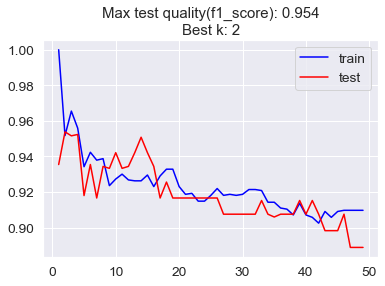

In [273]:
neighbors = range(1, 50)
f1_score_train = []
f1_score_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    f1_score_train.append(f1_score(knn.predict(X_train_scaled), y_train))
    f1_score_test.append(f1_score(knn.predict(X_test_scaled), y_test))
    
plt.plot(neighbors, f1_score_train, color='blue', label='train')
plt.plot(neighbors, f1_score_test, color='red', label='test')
plt.title("Max test quality(f1_score): {:.3f}\nBest k: {}".format(max(f1_score_test), np.argmax(f1_score_test)+1))
plt.legend();

In [274]:
knn_k = 2
knn = KNeighborsClassifier(n_neighbors=knn_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
quality(y_pred, y_test)
print(f'roc_auc_score: {round(roc_auc_score(knn.predict(X_test_scaled), y_test), 3)}')

Accuracy: 0.965, nPrecision: 0.969, Recall: 0.939, F1-score: 0.954
roc_auc_score: 0.96


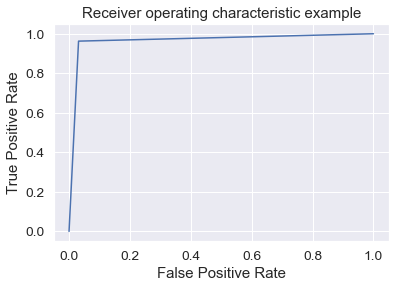

In [275]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
metrics.auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()

#### Вывод качество модели ухудшилось